# Exploratory Data Analysis

In [1]:
import os
import sys
from importlib import reload
sys.path.append('../src')

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import tqdm
import matplotlib.pyplot as plt


### Read in data

In [2]:
%%time
train_toxic_comment = pd.read_csv('../input/jigsaw-toxic-comment-train.csv', usecols=[0,1,2])
train_toxic_comment_lengths = train_toxic_comment.comment_text.apply(len)
train_toxic_comment['length'] = train_toxic_comment_lengths
validation = pd.read_csv('../input/validation.csv')
validation_comment_lengths = validation.comment_text.apply(len)
validation['length'] = validation_comment_lengths
test = pd.read_csv('../input/test.csv')
test_comment_lengths = test.content.apply(len)
test['length'] = test_comment_lengths
train_unintended_bias = pd.read_csv('../input/jigsaw-unintended-bias-train.csv')
train_unintended_comment_lengths = train_unintended_bias.comment_text.apply(len)
train_unintended_bias['length'] = train_unintended_comment_lengths


Wall time: 9.91 s


### Quick peek

In [3]:
# Long comments
display((train_toxic_comment[(train_toxic_comment.length > 4950) & (train_toxic_comment.toxic == 1)]).head())

,id,comment_text,toxic,length
2420,067c5e814e88a56b,FUCK YOU U USELESS BOT FUCK YOU U USELESS BOT ...,1,4999
4174,0b2055f13934a41e,ii CAN STILL POST WITH THIS COMPUTER...I SAID ...,1,5000
4712,0c7c341727488579,do go fuck off bastard\nDo Yyou Have a life?\n...,1,4969
5220,0de42f5e853a41ef,HATE YOU HATE YOU HATE YOU HATE YOU HATE YOU H...,1,4986
5523,0eb9c1ca1e5ffaa0,Go fuck yourself! Go fuck yourself! Go fuck yo...,1,4986


In [4]:
display(train_toxic_comment[train_toxic_comment.toxic == 0].iloc[0].comment_text)
display(train_toxic_comment[train_toxic_comment.toxic == 1].iloc[566].comment_text)

"Explanation\nWhy the edits made under my username Hardcore Metallica Fan were reverted? They weren't vandalisms, just closure on some GAs after I voted at New York Dolls FAC. And please don't remove the template from the talk page since I'm retired now.89.205.38.27"

'Shut up, read what I left on talk page, before you give me pure garbage, you are the one who is vandalizing everything by not fixing things the way they ought to be, i reject your reply fully.'

In [5]:
display(validation[validation.toxic == 0].iloc[0].comment_text)
display(validation[validation.toxic == 1].iloc[0].comment_text)

'Este usuario ni siquiera llega al rango de    hereje   . Por lo tanto debería ser quemado en la barbacoa para purificar su alma y nuestro aparato digestivo mediante su ingestión.    Skipe linkin 22px   Honor, valor, leltad.      17:48 13 mar 2008 (UTC)'

'Vale. Sólo expongo mi pasado. Todo tiempo pasado fue mejor, ni mucho menos, yo no quisiera retroceder 31 años a nivel particular. Las volveria a pasar putas.Fernando '

### Exploring class distributions
How are classes distributed

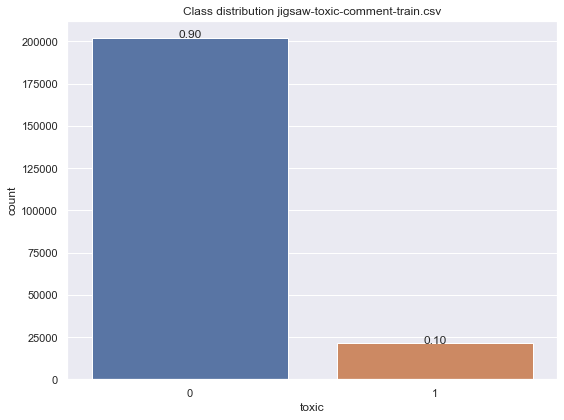

In [6]:
plt.figure(figsize=(8,6))

sns.set(style="darkgrid")
ax = sns.countplot(x="toxic", data=train_toxic_comment)
plt.title("Class distribution jigsaw-toxic-comment-train.csv")


total = float(len(train_toxic_comment))

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format(height/total),
            ha="center") 
    

plt.tight_layout()
plt.savefig('jigsaw_1_class_distribution.png', dpi=300)

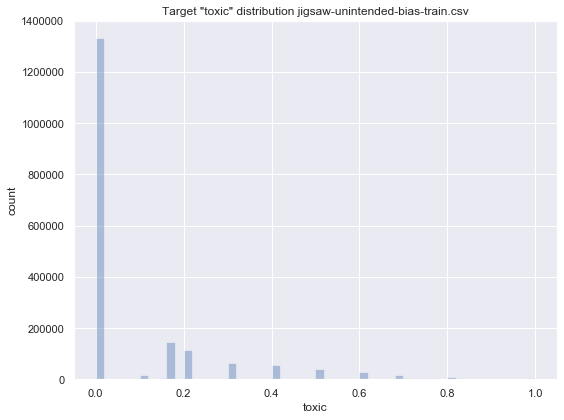

In [7]:
plt.figure(figsize=(8,6))
sns.distplot(train_unintended_bias["toxic"], kde=False);
plt.title("Target \"toxic\" distribution jigsaw-unintended-bias-train.csv")
plt.ylabel("count")

plt.tight_layout()
plt.savefig('jigsaw_target_toxic_distribution.png', dpi=300)

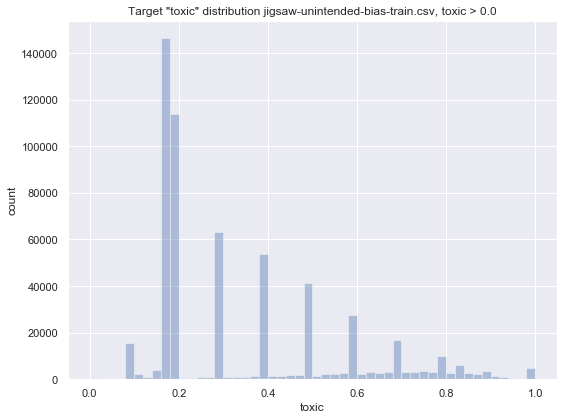

In [8]:
plt.figure(figsize=(8,6))
sns.distplot(train_unintended_bias[train_unintended_bias.toxic > 0.0]["toxic"], kde=False);
#ax = sns.countplot(x="toxic", data=train_toxic_comment)
plt.ylabel("count")
plt.title("Target \"toxic\" distribution jigsaw-unintended-bias-train.csv, toxic > 0.0")

plt.tight_layout()
plt.savefig('jigsaw_target_toxic_distribution_2.png', dpi=300)

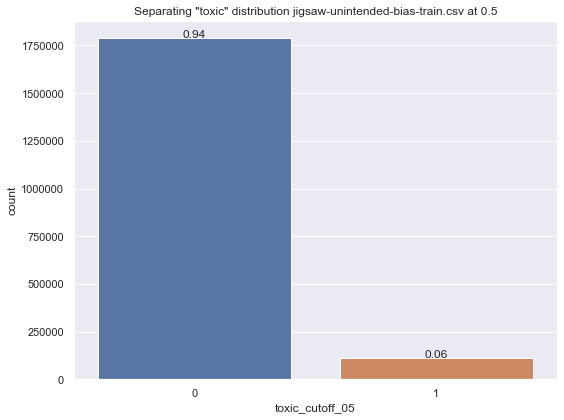

In [9]:
# Group at 0.5
plt.figure(figsize=(8,6))

train_unintended_bias["toxic_cutoff_05"] = train_unintended_bias["toxic"].apply(lambda x: 1 if x > 0.5 else 0)
ax = sns.countplot(x="toxic_cutoff_05", data=train_unintended_bias)
plt.title("Separating \"toxic\" distribution jigsaw-unintended-bias-train.csv at 0.5")

total = float(len(train_unintended_bias))

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format(height/total),
            ha="center") 
    

plt.tight_layout()
plt.savefig('jigsaw_target_toxic_distribution_3.png', dpi=300)

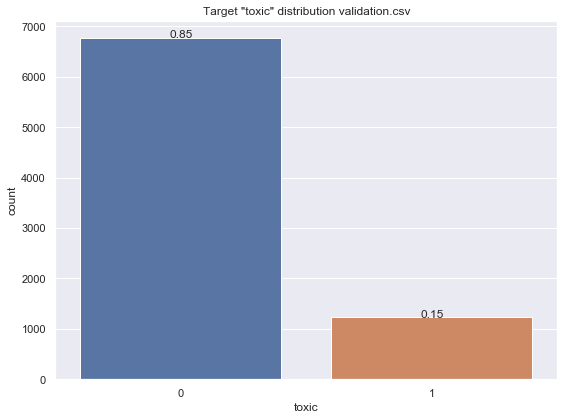

In [10]:
plt.figure(figsize=(8,6))

sns.set(style="darkgrid")
ax = sns.countplot(x="toxic", data=validation)
plt.title("Target \"toxic\" distribution validation.csv")


total = float(len(validation))

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format(height/total),
            ha="center") 
    


plt.tight_layout()
plt.savefig('jigsaw_target_toxic_distribution_4.png', dpi=300)

### Exploring language distributions

In each dataset, what is the proportion of each language?

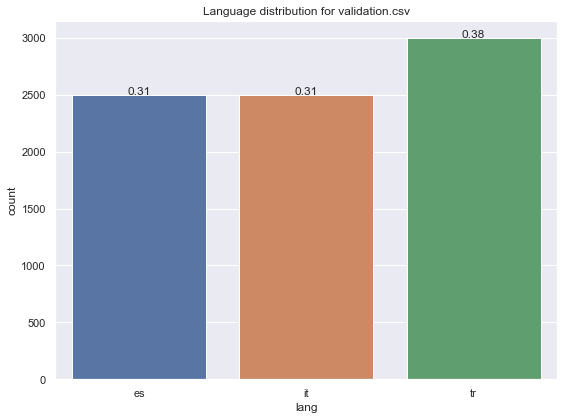

In [11]:
plt.figure(figsize=(8,6))

ax = sns.countplot(validation.lang)
ax.set_title("Language distribution for validation.csv")
total = float(len(validation)) # one person per row 
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format(height/total),
            ha="center")     
    

plt.tight_layout()
plt.savefig('lang1.png', dpi=300)

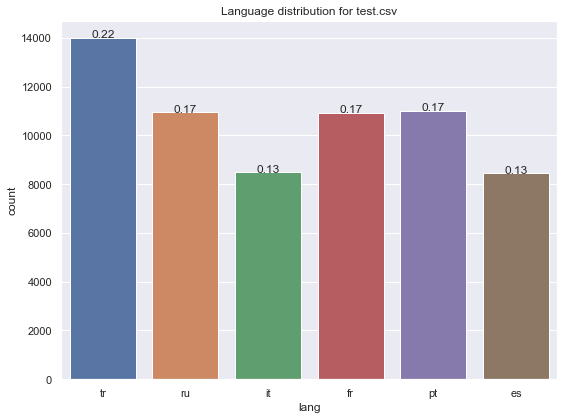

In [12]:
plt.figure(figsize=(8,6))

ax = sns.countplot(test.lang)
ax.set_title("Language distribution for test.csv")
total = float(len(test)) # one person per row 
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format(height/total),
            ha="center")     
plt.tight_layout()
plt.savefig('lang2.png', dpi=300)


### Exploring length distributions
In each dataset, how long are the comments?

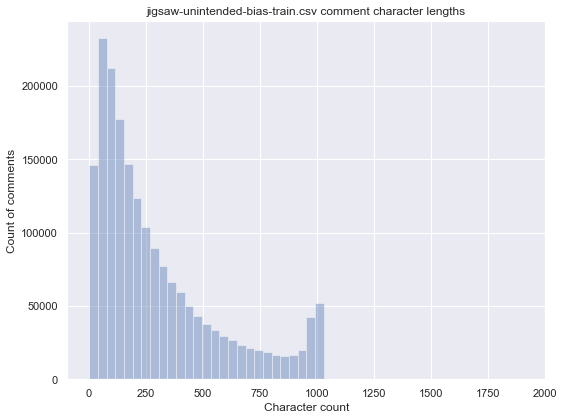

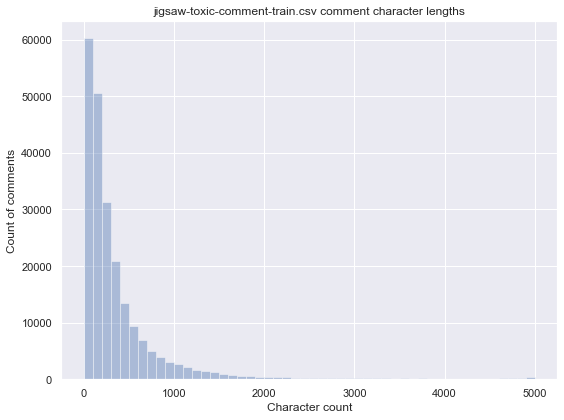

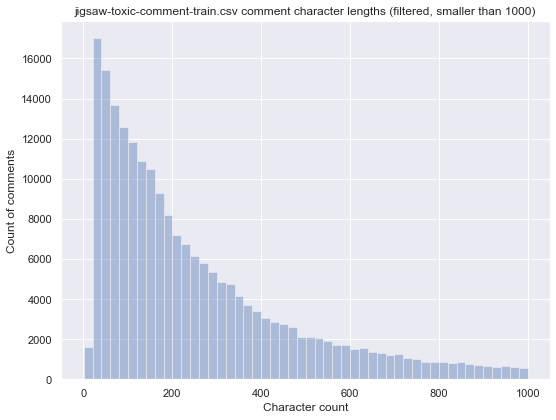

In [13]:
# collect all character lengths
unintended_bias_lengths = train_unintended_bias.comment_text.apply(len)
train_toxic_comment_lengths = train_toxic_comment.comment_text.apply(len)

all_eng_lengths = np.array(list(unintended_bias_lengths.values))
plt.figure(figsize=(8,6))
sns.distplot(all_eng_lengths, kde=False);
plt.title("jigsaw-unintended-bias-train.csv comment character lengths")
plt.ylabel("Count of comments")
plt.xlabel("Character count")

plt.tight_layout()
plt.savefig('lengths1.png', dpi=300)

all_eng_lengths = np.array(list(train_toxic_comment_lengths.values))

plt.figure(figsize=(8,6))

sns.distplot(all_eng_lengths, kde=False);
plt.title("jigsaw-toxic-comment-train.csv comment character lengths")
plt.ylabel("Count of comments")
plt.xlabel("Character count")

plt.tight_layout()
plt.savefig('lengths2.png', dpi=300)

plt.figure(figsize=(8,6))

sns.distplot(all_eng_lengths[all_eng_lengths < 1000], kde=False);
plt.title("jigsaw-toxic-comment-train.csv comment character lengths (filtered, smaller than 1000)")
plt.ylabel("Count of comments")
plt.xlabel("Character count")

plt.tight_layout()
plt.savefig('lengths3.png', dpi=300)


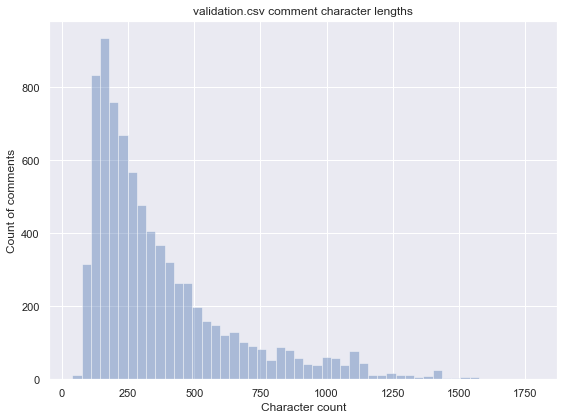

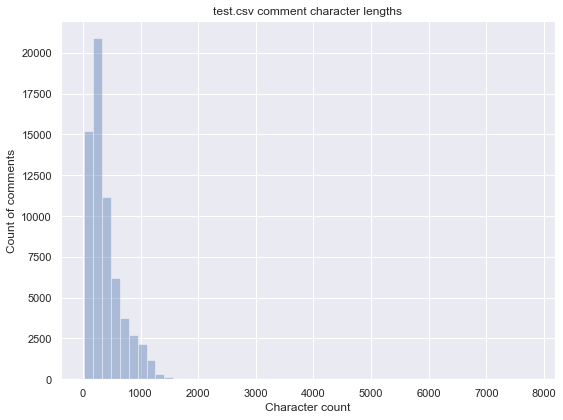

In [14]:
# collect all character lengths

plt.figure(figsize=(8,6))
validation_lengths = validation.comment_text.apply(len)
sns.distplot(validation_lengths, kde=False);
plt.title("validation.csv comment character lengths")
plt.ylabel("Count of comments")
plt.xlabel("Character count")

plt.tight_layout()
plt.savefig('validation_lengths.png', dpi=300)
plt.figure(figsize=(8,6))

test_lengths = test.content.apply(len)
sns.distplot(test_lengths, kde=False);
plt.title("test.csv comment character lengths")
plt.ylabel("Count of comments")
plt.xlabel("Character count")

plt.tight_layout()
plt.savefig('test_lengths.png', dpi=300)


### Toxicity relation to comment length

In [15]:
## Calculate proportion of toxic at every 100 letters
train_toxic_comment['group'] = pd.cut(train_toxic_comment['length'], 100)
tt = train_toxic_comment.groupby(['group', 'toxic']).agg(len)
rt = tt.reset_index()
positive_counts = rt[rt.toxic == 1]['id']
negative_counts = rt[rt.toxic == 0]['id']
toxic_ratio = positive_counts.values / (positive_counts.values + negative_counts.values)
cats = pd.cut(train_toxic_comment['length'], 100).cat.categories
cats.values

<IntervalArray>
[(-3.999, 50.99], (50.99, 100.98], (100.98, 150.97], (150.97, 200.96], (200.96, 250.95] ... (4750.05, 4800.04], (4800.04, 4850.03], (4850.03, 4900.02], (4900.02, 4950.01], (4950.01, 5000.0]]
Length: 100, closed: right, dtype: interval[float64]

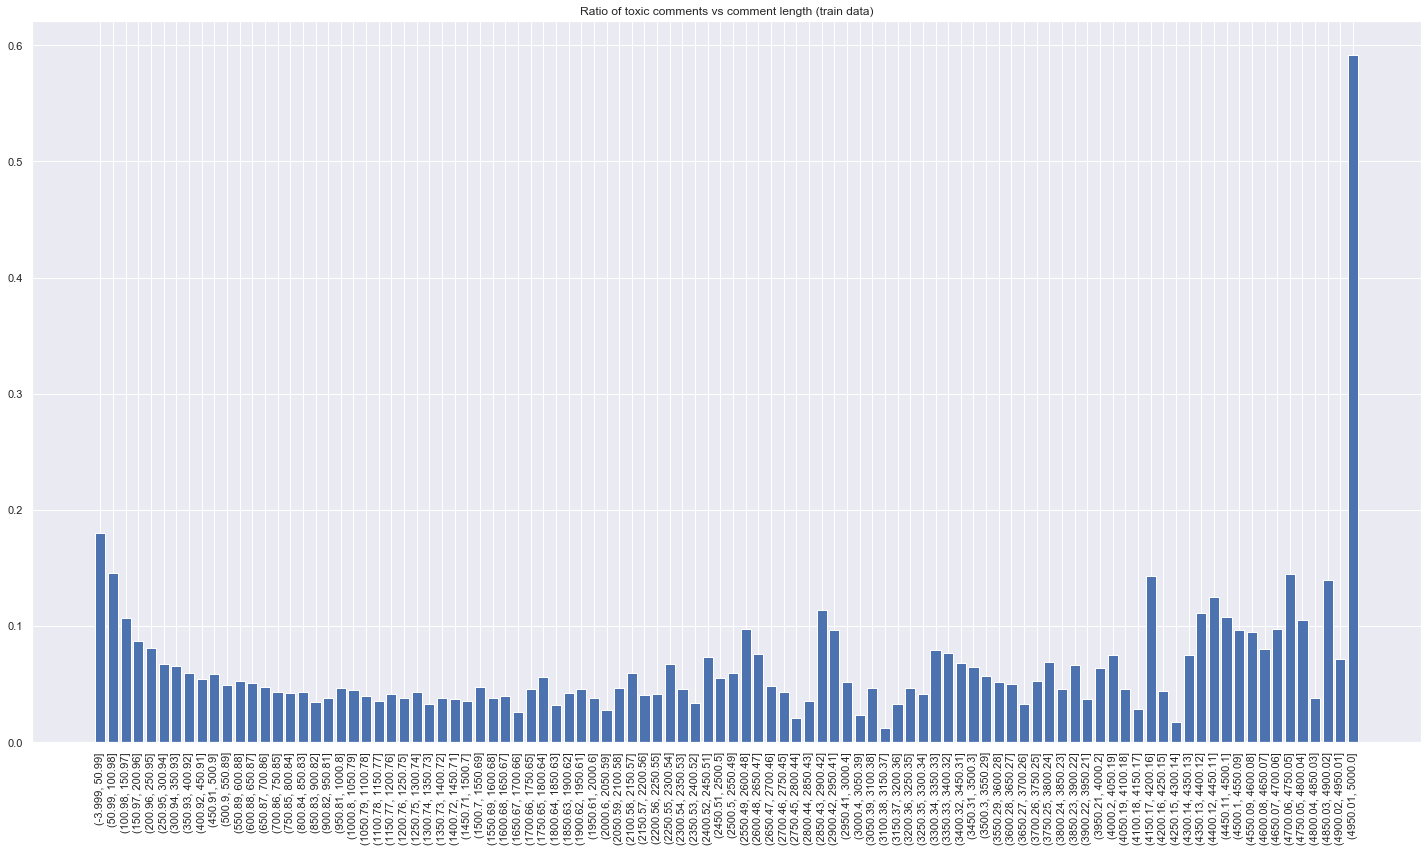

In [16]:
plt.figure(figsize=(20, 12))
plt.title('Ratio of toxic comments vs comment length (train data)')
plt.xticks(rotation=90)
plt.bar(list(map(str, cats)), toxic_ratio)

plt.tight_layout()
plt.savefig('toxic_ratio.png', dpi=300)

# Datasets sizes


In [19]:
df

,dataset,count
0,Train unbiased,1902194
1,Train toxic comment,223549
2,Test,63812
3,Validation,8000


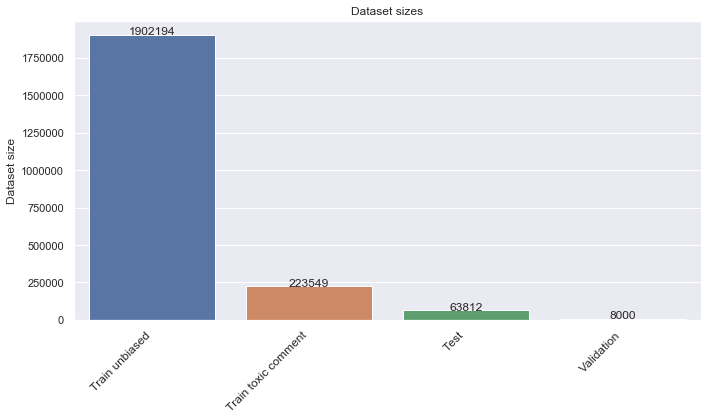

In [18]:
length_train_unbiased = len(train_unintended_bias)
length_train_toxic = len(train_toxic_comment)
length_test = len(test)
length_validation = len(validation)

df = pd.DataFrame(
{
    "dataset": ["Train unbiased", "Train toxic comment", "Test", "Validation"],
    "count": [length_train_unbiased, length_train_toxic, length_test, length_validation]
})

plt.figure(figsize=(10,6))

sns.set(style="darkgrid")
ax = sns.barplot(x="dataset", y="count", data=df)
plt.title("Dataset sizes")
plt.xlabel("")
plt.ylabel("Dataset size")

total = float(np.sum(df["count"]))

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            f'{int(height)}',
            ha="center") 
    
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='medium'  
)
plt.tight_layout()
plt.savefig('dataset_sizes.png', dpi=300)